In [1]:
from data.dataset import load_dataset
from helpers.data_research import initial_values, data_research
from helpers.correlataion import find_correlated_columns
from data.create_dataset import create_dataset

from sklearn import preprocessing

from models.MLR_Model import create_MLR_model

import pickle

In [2]:
dataset = load_dataset()

In [3]:
print(dataset)

                      mdct        date    yr  mo  da  hr  prcp     stp  \
0      2006-10-31 00:00:00  2006-10-31  2006  10  31   0   0.0     0.0   
1      2006-10-31 01:00:00  2006-10-31  2006  10  31   1   0.0     0.0   
2      2006-10-31 02:00:00  2006-10-31  2006  10  31   2   0.0     0.0   
3      2006-10-31 03:00:00  2006-10-31  2006  10  31   3   0.0     0.0   
4      2006-10-31 04:00:00  2006-10-31  2006  10  31   4   0.0     0.0   
...                    ...         ...   ...  ..  ..  ..   ...     ...   
86947  2016-09-30 19:00:00  2016-09-30  2016   9  30  19   0.0  1015.3   
86948  2016-09-30 20:00:00  2016-09-30  2016   9  30  20   0.0  1015.7   
86949  2016-09-30 21:00:00  2016-09-30  2016   9  30  21   0.0  1016.0   
86950  2016-09-30 22:00:00  2016-09-30  2016   9  30  22   0.0  1016.5   
86951  2016-09-30 23:00:00  2016-09-30  2016   9  30  23   0.0  1017.8   

          gbrd  temp  dewp  hmdy  wdsp   wdct  gust  
0        0.000   0.0   0.0   0.0   0.0    0.0   0.0  
1  

YEAR: 2016
MINIMAL: 14.2
MAXIMUM: 35.6


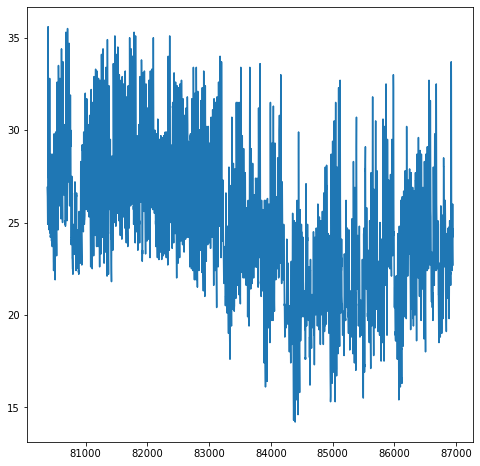

YEAR: 2006
MINIMAL: 0.0
MAXIMUM: 34.7


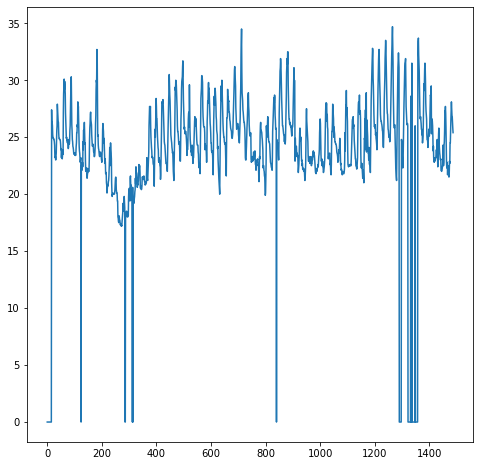

YEAR: 2007
MINIMAL: 0.0
MAXIMUM: 35.4


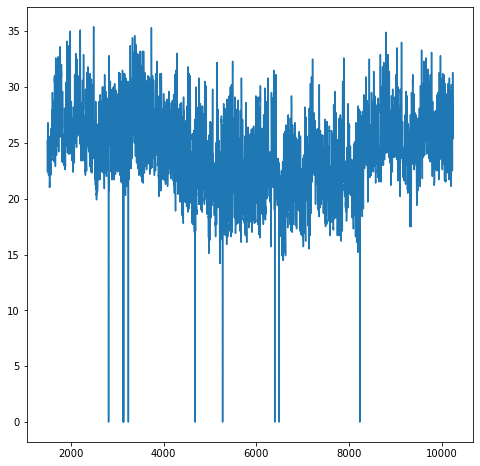

YEAR: 2008
MINIMAL: 0.0
MAXIMUM: 35.3


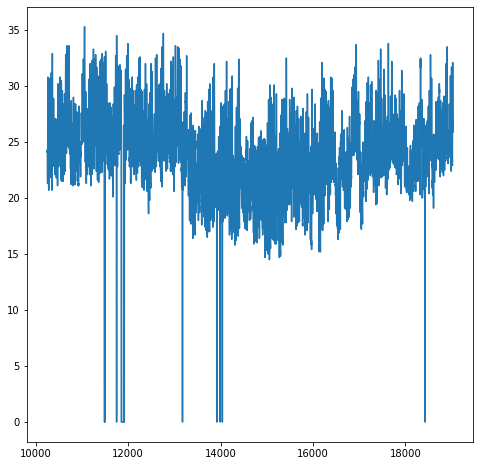

YEAR: 2009
MINIMAL: 0.0
MAXIMUM: 37.0


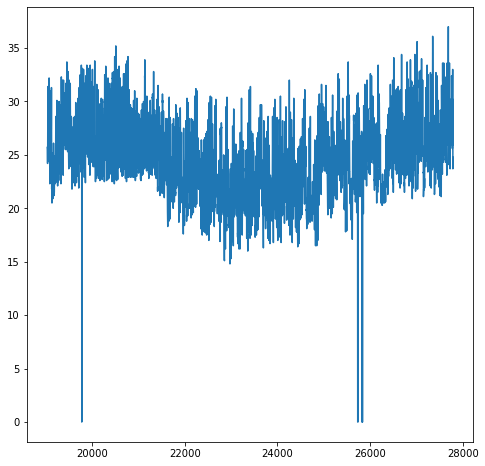

YEAR: 2010
MINIMAL: 0.0
MAXIMUM: 37.2


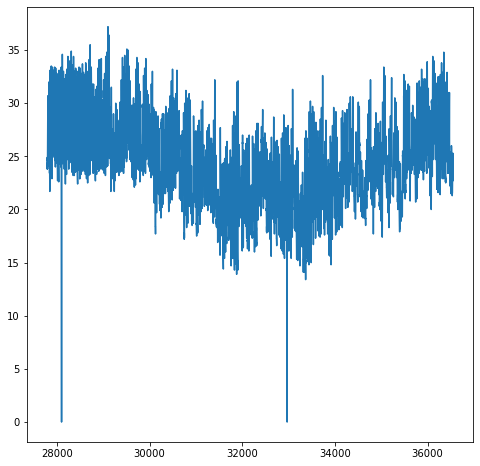

YEAR: 2011
MINIMAL: 0.0
MAXIMUM: 34.4


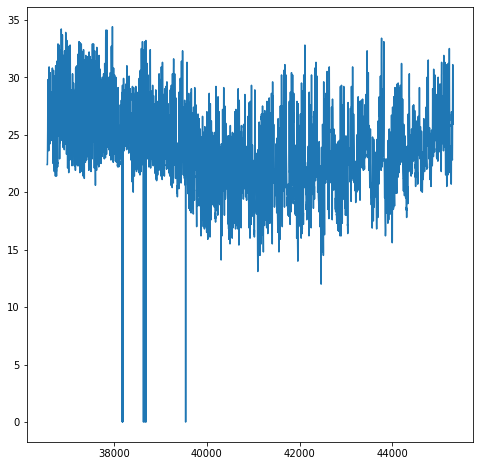

YEAR: 2012
MINIMAL: 0.0
MAXIMUM: 37.1


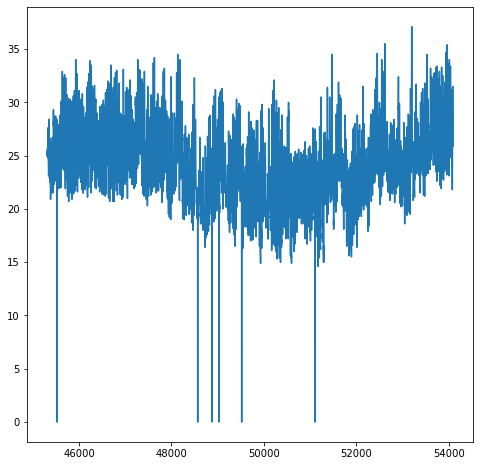

YEAR: 2013
MINIMAL: 0.0
MAXIMUM: 36.0


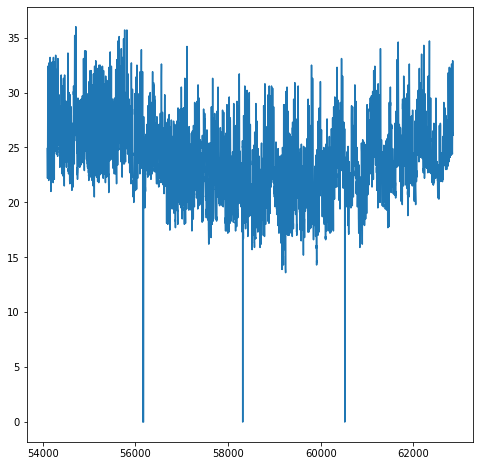

YEAR: 2014
MINIMAL: 0.0
MAXIMUM: 35.6


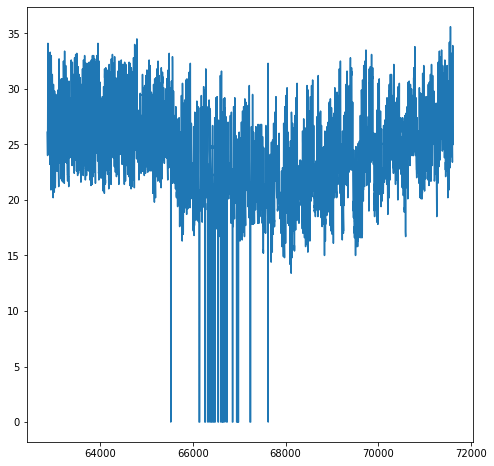

YEAR: 2015
MINIMAL: 0.0
MAXIMUM: 37.0


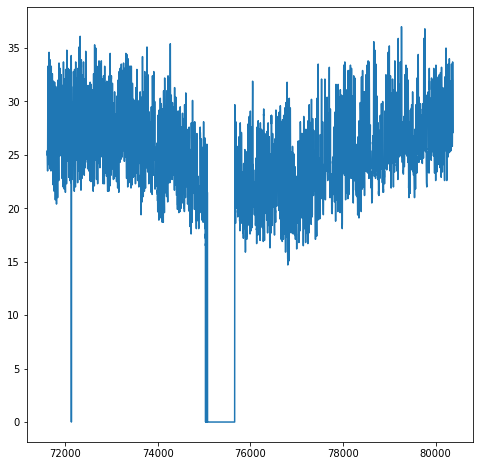

In [4]:
initial_values(dataset, 'temp')

YEAR: 2016
MEAN: 24.725897201946474
MINIMAL: 14.2
MAXIMUM: 35.6
STANDARD DEVIATION: 3.828126440782392


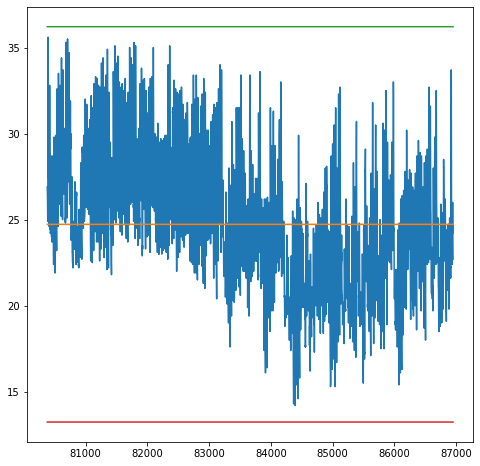

YEAR: 2006
MEAN: 24.839516129032255
MINIMAL: 17.2
MAXIMUM: 34.7
STANDARD DEVIATION: 2.9509765690766407


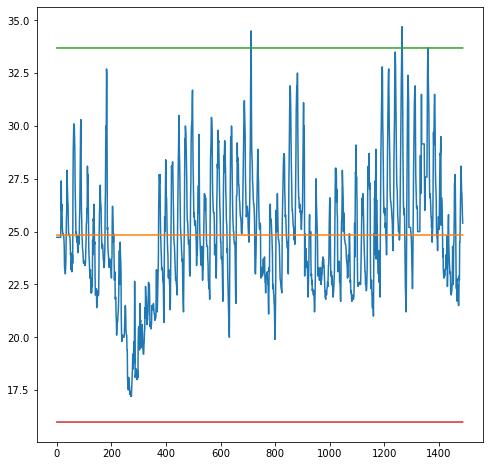

YEAR: 2007
MEAN: 24.203616438356168
MINIMAL: 14.2
MAXIMUM: 35.4
STANDARD DEVIATION: 3.599372159724289


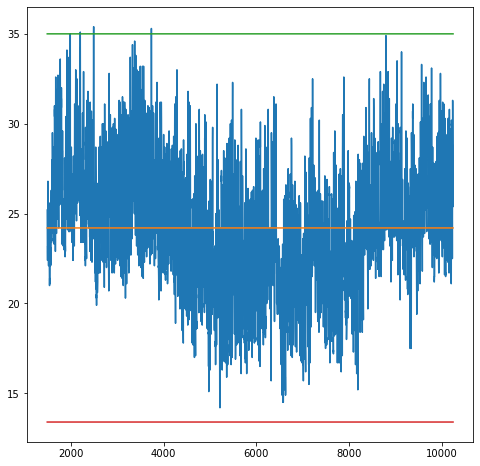

YEAR: 2008
MEAN: 23.984933970856098
MINIMAL: 14.5
MAXIMUM: 35.3
STANDARD DEVIATION: 3.5762010474318147


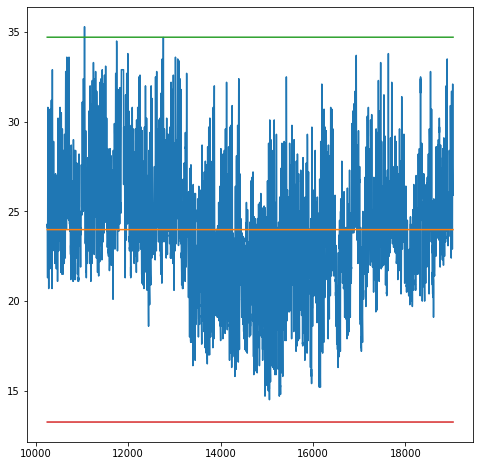

YEAR: 2009
MEAN: 24.62398515981735
MINIMAL: 14.8
MAXIMUM: 37.0
STANDARD DEVIATION: 3.5614109875412527


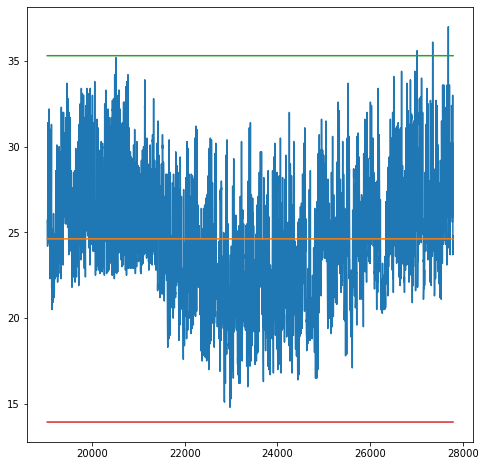

YEAR: 2010
MEAN: 24.268635844748857
MINIMAL: 13.4
MAXIMUM: 37.2
STANDARD DEVIATION: 4.026700263607955


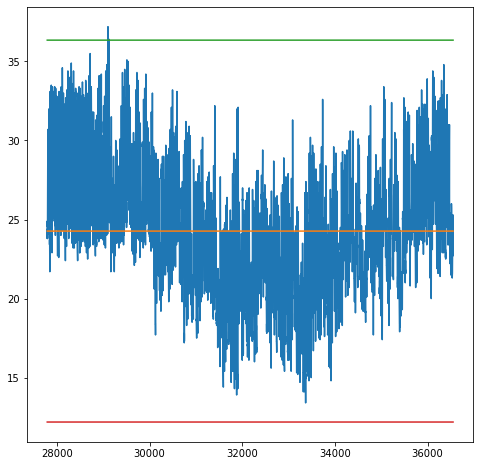

YEAR: 2011
MEAN: 23.64087214611872
MINIMAL: 12.0
MAXIMUM: 34.4
STANDARD DEVIATION: 3.605514388199942


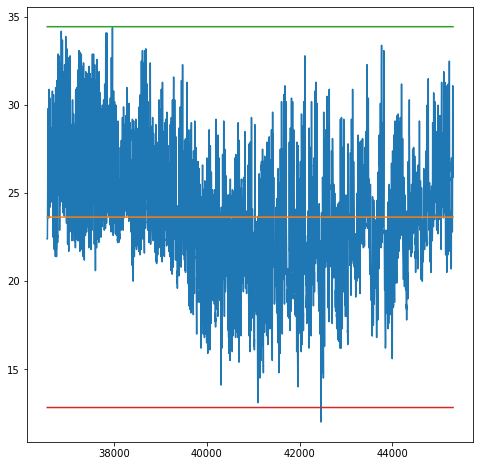

YEAR: 2012
MEAN: 24.09573428961749
MINIMAL: 14.6
MAXIMUM: 37.1
STANDARD DEVIATION: 3.598851782551768


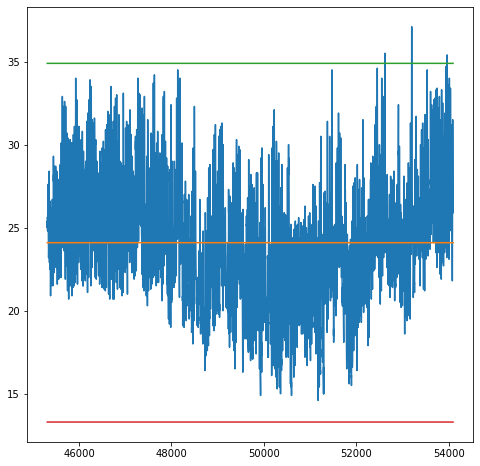

YEAR: 2013
MEAN: 23.967339041095894
MINIMAL: 13.6
MAXIMUM: 36.0
STANDARD DEVIATION: 3.6074837676434117


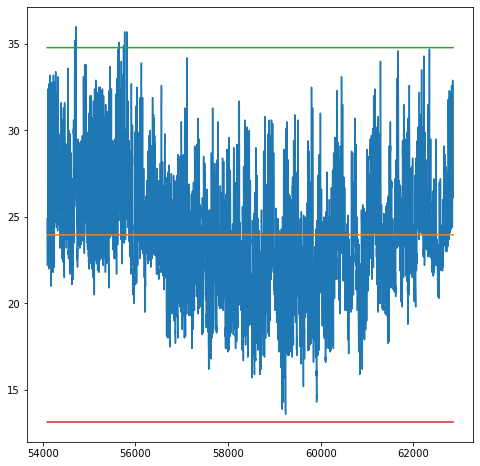

YEAR: 2014
MEAN: 24.204835616438356
MINIMAL: 13.4
MAXIMUM: 35.6
STANDARD DEVIATION: 3.824316406507837


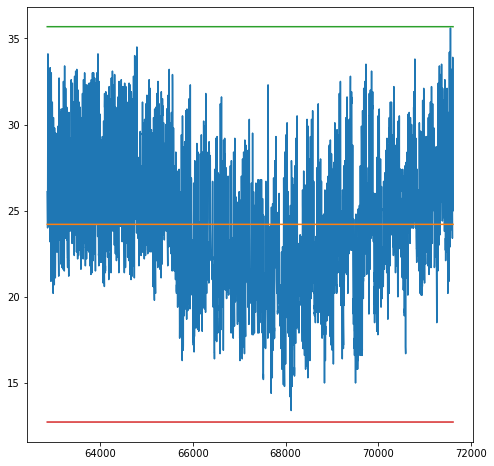

YEAR: 2015
MEAN: 24.94039726027397
MINIMAL: 14.7
MAXIMUM: 37.0
STANDARD DEVIATION: 3.7511487210793804


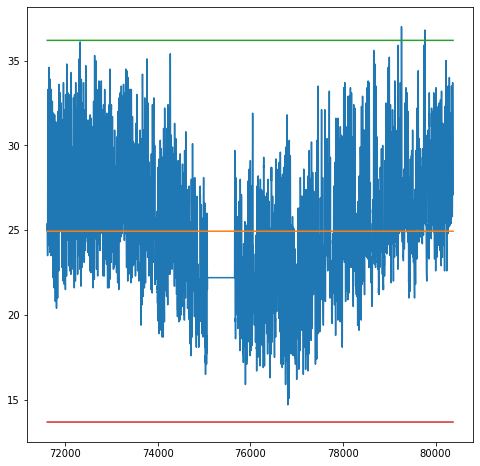

In [5]:
data_research(dataset, 'temp')

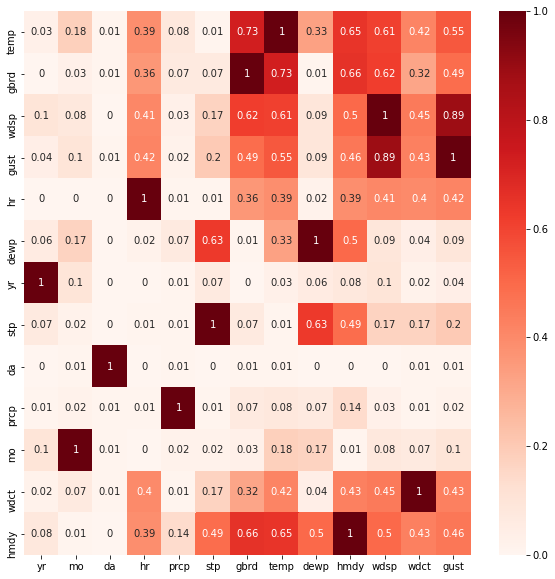

temp    1.000000
gbrd    0.730978
wdsp    0.606191
gust    0.551623
hr      0.394340
dewp    0.326034
mo      0.175883
wdct    0.417208
hmdy    0.645084
Name: temp, dtype: float64


['gbrd', 'wdsp', 'gust', 'hr', 'dewp', 'mo', 'wdct', 'hmdy']

In [6]:
find_correlated_columns(dataset, 'temp')

In [7]:
# data predictors
# we normalize the data to bring all the variables to the same range
# normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values
#X_temp = create_dataset(df_filtered, features_temp)
X_temp = dataset.loc[:, ~dataset.columns.isin(['temp', 'mdct', 'date'])]
X_temp = preprocessing.normalize(X_temp)
print(X_temp)

[[9.99868193e-01 4.98438780e-03 1.54516022e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99868069e-01 4.98438718e-03 1.54516003e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [9.99867696e-01 4.98438533e-03 1.54515945e-02 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [8.89845492e-01 3.97252452e-03 1.32417484e-02 ... 6.17948258e-04
  7.41537910e-02 1.98626226e-03]
 [8.90049621e-01 3.97343581e-03 1.32447860e-02 ... 7.06388588e-04
  7.01973660e-02 1.85427004e-03]
 [8.88936891e-01 3.96846826e-03 1.32282275e-02 ... 6.17317285e-04
  8.24559517e-02 1.98423413e-03]]


In [8]:
# data response
y_temp = create_dataset(dataset, ['temp'])
print(y_temp)

        temp
0      24.73
1      24.73
2      24.73
3      24.73
4      24.73
...      ...
86947  23.80
86948  23.60
86949  23.30
86950  23.00
86951  22.70

[86952 rows x 1 columns]


The model performance for training set
########################################
MSE is 0.3108530910085254
########################################
The model performance for testing set
########################################
MSE is 1.3203562052402893
########################################
PLOT RESULTS


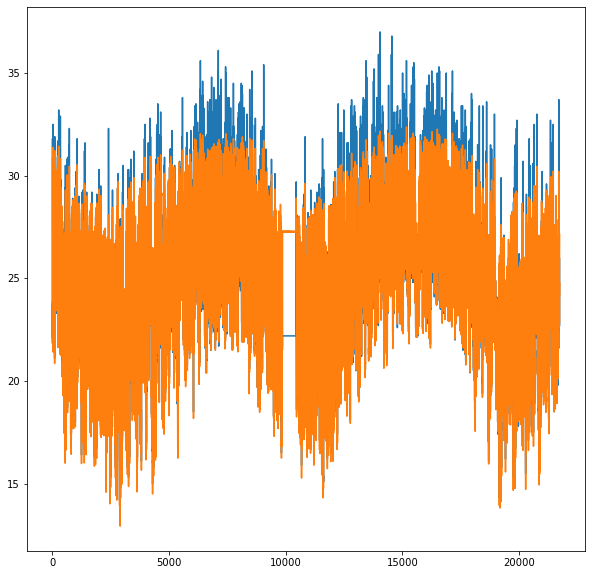

In [9]:
model = create_MLR_model(X_temp, y_temp)

In [10]:
# model_name = 'finalized_MLR_model.sav'

# save the model to disk
# pickle.dump(model, open(model_name, 'wb'))